In [1]:
# Libraries
suppressPackageStartupMessages({
    library(Seurat)
    library(scater)
    library(Matrix)
    library(dplyr)
    library(patchwork)
    library(ggplot2)
    library(clusterProfiler)
    #library(DropletUtils)
    #library(tidyseurat)
    #library(SeuratDisk)
    #library(tidyr)
    #library(purrr)
    #library(magrittr)
    #library(reticulate)
    #library(MAST)
})

In [2]:
so <- readRDS('datasets/seurat/Seurat_aggr_QC2.rds')

In [3]:
so.markers <- FindAllMarkers(so, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.7)
top3 <- so.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_log2FC)

Calculating cluster EB1

Calculating cluster ISC1

Calculating cluster ISC2

Calculating cluster EC-like

Calculating cluster EB3

Calculating cluster EB2

Calculating cluster mEC

Calculating cluster AstC+EE

Calculating cluster apEC

Calculating cluster Tk+EE



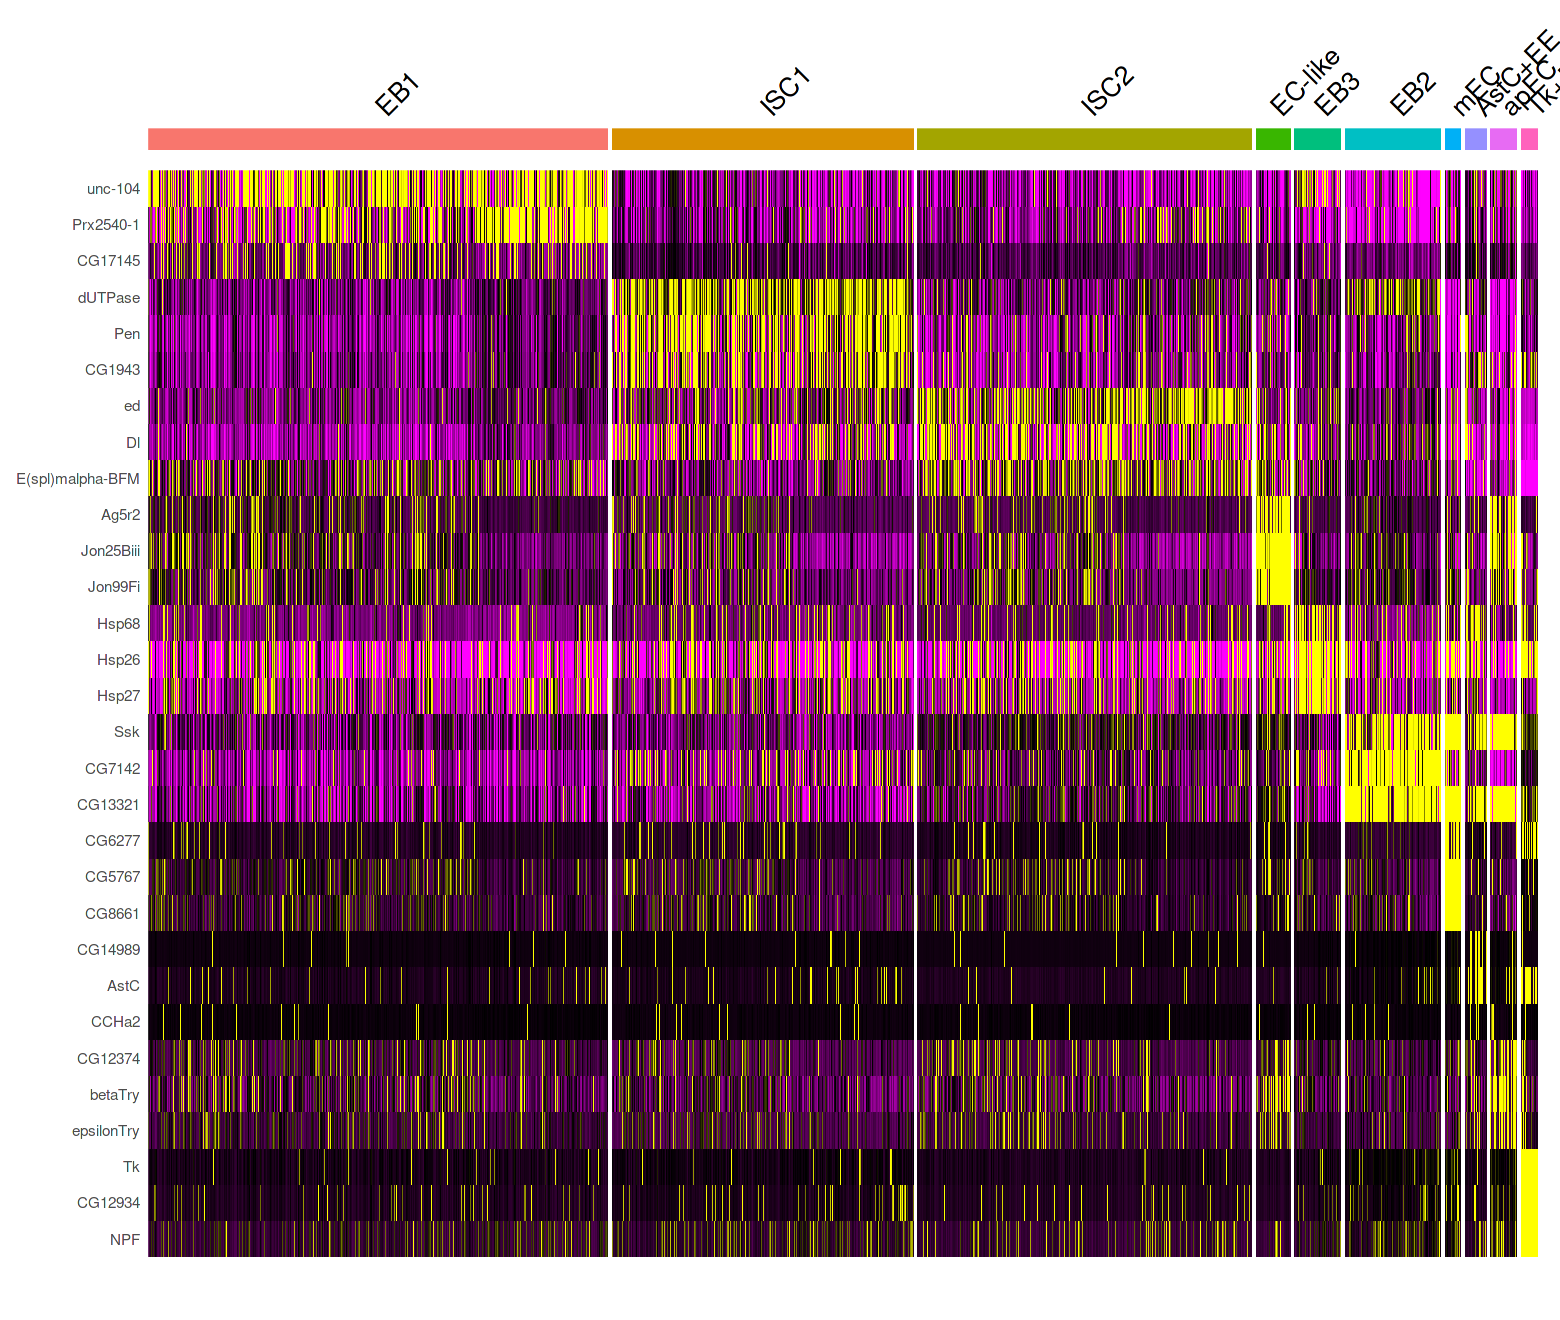

In [4]:
options(repr.plot.width = 13, repr.plot.height = 11)
DoHeatmap(so, features = top3$gene) + NoLegend()

In [5]:
# ISC1 cluster
top10 <- so.markers %>% group_by(cluster) %>% 
            filter(cluster == 'ISC1') %>% top_n(n = 10, wt = avg_log2FC)
top10$gene

[1] "Fkbp39"  "dUTPase" "Pen"     "His2Av"  "HmgD"    "PCNA"    "Tsp42Ee"
 [8] "CG1943"  "CG15083" "Cpr51A"

In [6]:
# AstC+EE
top10 <- so.markers %>% group_by(cluster) %>% 
            filter(cluster == 'AstC+EE') %>% top_n(n = 10, wt = avg_log2FC)
top10$gene

[1] "pros"      "CG4577"    "7B2"       "CCHa1"     "CG14989"   "Orcokinin"
 [7] "AstC"      "AstA"      "CG34386"   "CCHa2"

In [7]:
# Tk+EE
top10 <- so.markers %>% group_by(cluster) %>% 
            filter(cluster == 'Tk+EE') %>% top_n(n = 10, wt = avg_log2FC)
top10$gene

[1] "Tk"      "Pal2"    "CG7191"  "Scp2"    "CG44325" "7B2"     "IA-2"   
 [8] "CG12934" "NPF"     "Phm"

# DEGs by Seurat
https://satijalab.org/seurat/archive/v3.1/de_vignette.html

In [9]:
# Identify DEGs in EE clusters comparing against all other cells

# search for positive markers
astcee.DEGxAll.markers <- FindMarkers(so, ident.1 = "AstC+EE", ident.2 = NULL, only.pos = TRUE)
astcee.DEGxAll.markers$gene <- row.names(astcee.DEGxAll.markers)

# view results
head(astcee.DEGxAll.markers, 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CG18265,0.000000e+00,2.079727,0.750,0.012,0.000000e+00,CG18265
pros,7.098003e-304,3.917343,0.971,0.031,6.819052e-300,pros
NPFR,1.046198e-289,2.060717,0.559,0.007,1.005082e-285,NPFR
Ggamma30A,4.391373e-267,1.298776,0.500,0.006,4.218792e-263,Ggamma30A
ppk17,2.198883e-244,2.106243,0.309,0.001,2.112467e-240,ppk17
GstZ2,1.798021e-240,1.434069,0.544,0.009,1.727359e-236,GstZ2
Fer1,1.645212e-229,1.136806,0.382,0.003,1.580555e-225,Fer1
Rab3,3.469323e-214,1.611330,0.603,0.015,3.332978e-210,Rab3
SP2353,1.041290e-211,1.019958,0.441,0.006,1.000367e-207,SP2353


[1] "pros"      "CG4577"    "7B2"       "CCHa1"     "CG14989"   "Orcokinin"
 [7] "AstC"      "AstA"      "CG34386"   "CCHa2"

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', 

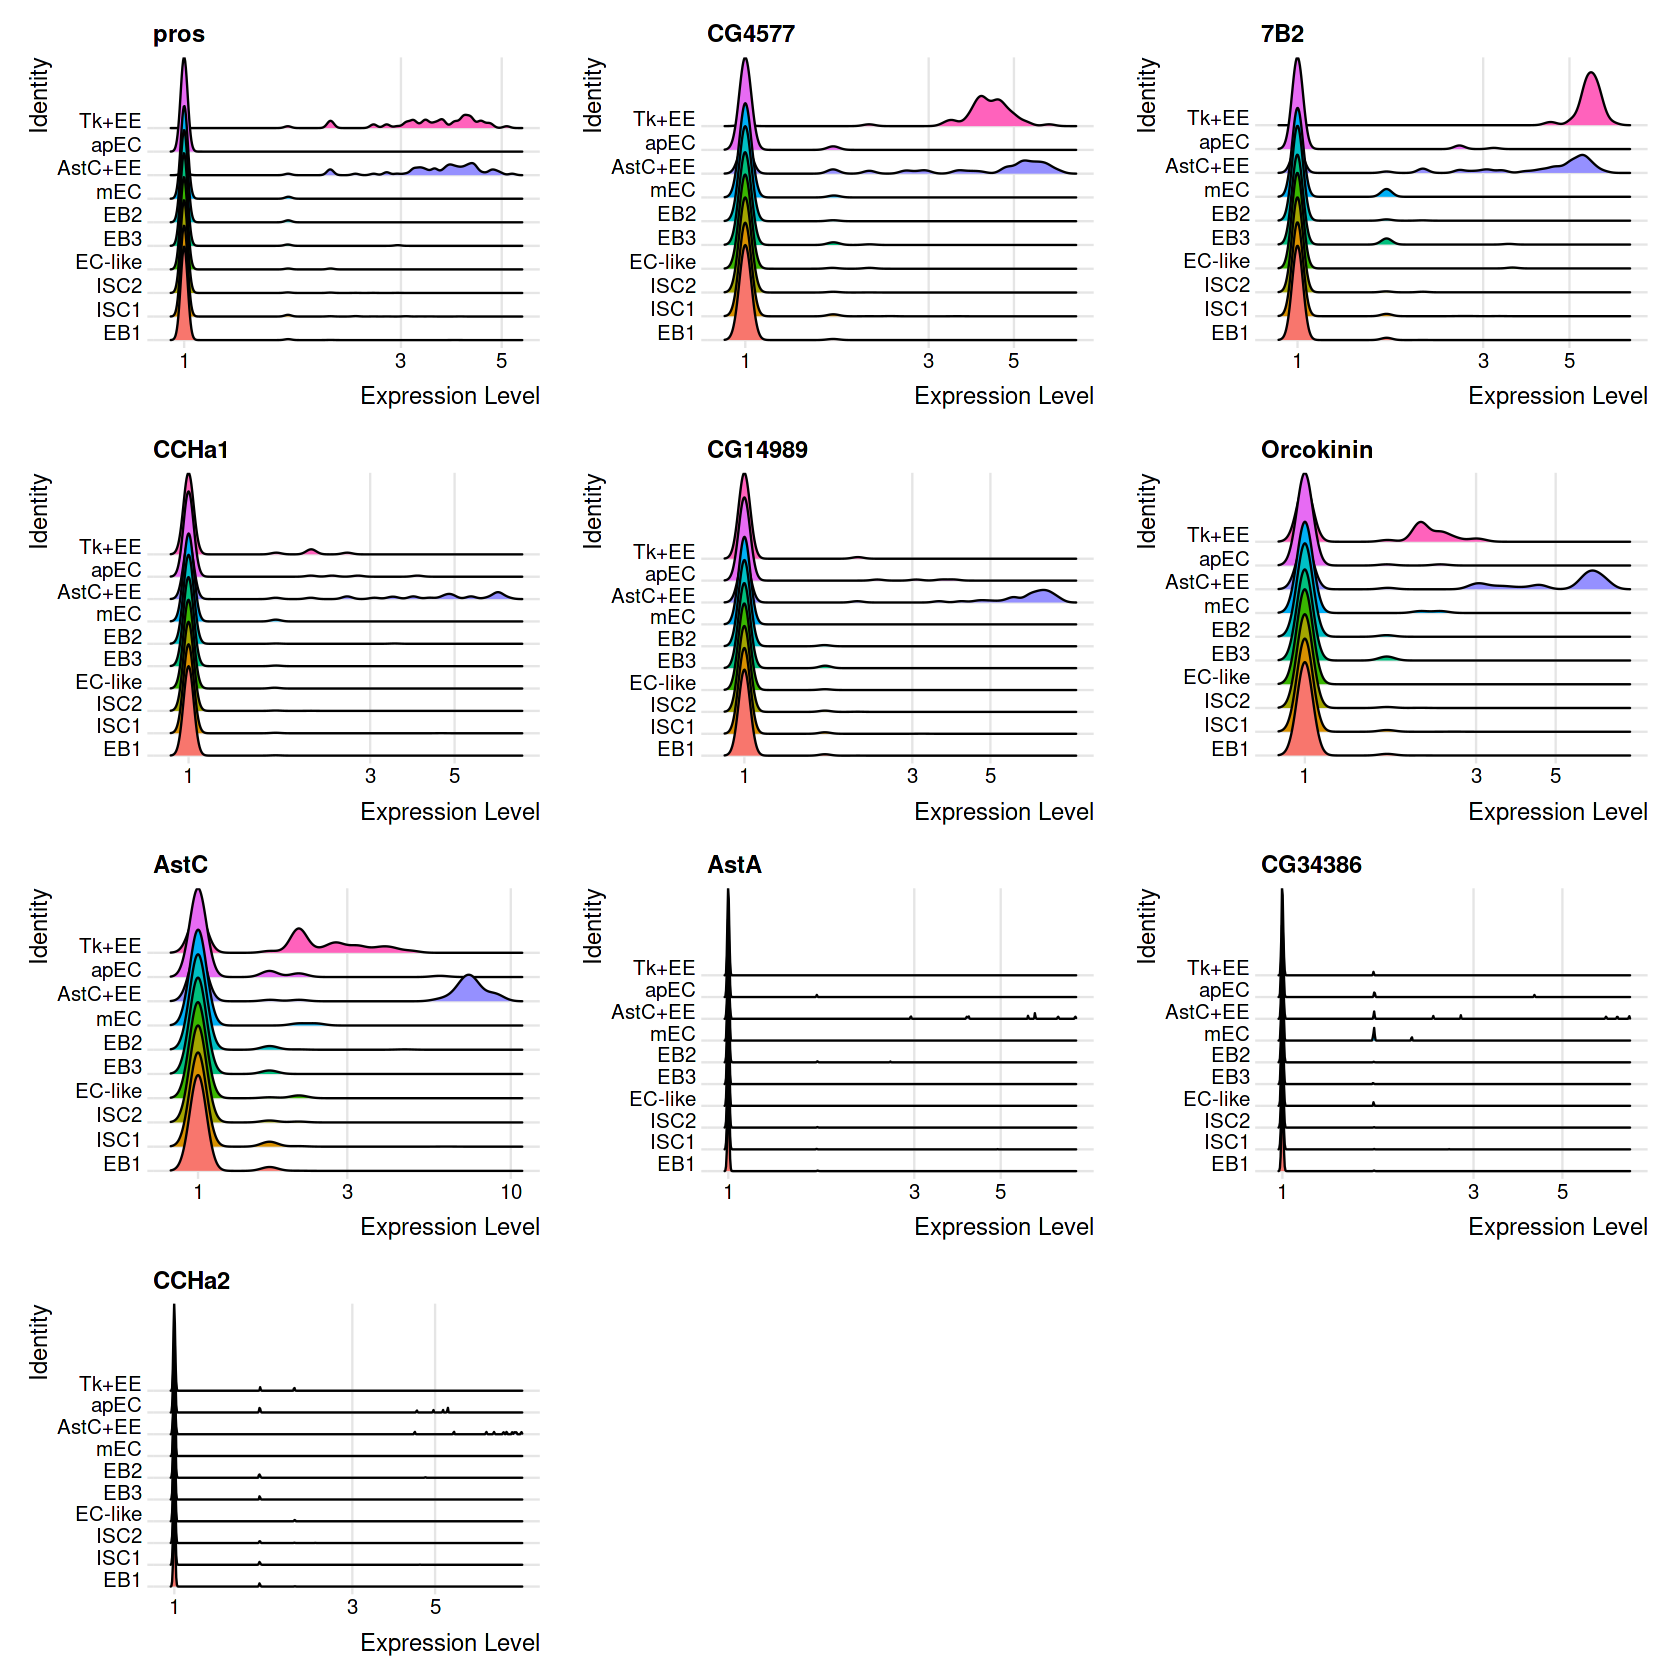

In [10]:
# Let's visualize the expression of the top 10 genes of each cluster in comparison to all cell types
# log of expression values

# AstC+EE
top10 <- astcee.DEGxAll.markers %>% top_n(n = 10, wt = avg_log2FC)
top10$gene

options(repr.plot.width = 14, repr.plot.height = 14)
# Ridge plots - from ggridges. Visualize single cell expression distributions in each cluster
RidgePlot(so, features = top10$gene, ncol = 3, log = TRUE)

In [11]:
# save results
colnames(astcee.DEGxAll.markers)[1] <- "Gene ID"
#write.table(astcee.DEGxAll.markers, file = 'astcee.DEGxAll.markers.tsv', quote = FALSE, sep = '\t', col.names = TRUE)

In [12]:
# Identify DEGs in EE clusters comparing against ISC1

# search for positive markers
astcee.DEGxISC1.markers <- FindMarkers(so, ident.1 = "AstC+EE", ident.2 = "ISC1", only.pos = TRUE)

# view results
head(astcee.DEGxISC1.markers, 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CG18265,3.184257e-155,2.123970,0.750,0.002,3.059116e-151
pros,2.038733e-147,4.101678,0.971,0.033,1.958611e-143
Rab3,7.285374e-123,1.670989,0.603,0.002,6.999059e-119
bru3,7.486458e-111,1.762783,0.574,0.004,7.192240e-107
NPFR,2.266259e-110,2.072798,0.559,0.003,2.177195e-106
Rim,9.801106e-110,1.549162,0.515,0.000,9.415922e-106
VhaM9.7-a,1.266585e-106,2.322245,0.588,0.008,1.216808e-102
CG44247,1.023538e-105,2.149898,0.632,0.013,9.833130e-102
amon,6.772370e-99,3.829614,0.529,0.005,6.506216e-95


In [13]:
# save results
colnames(astcee.DEGxISC1.markers)[1] <- "Gene ID"
#write.table(astcee.DEGxISC1.markers, file = 'astcee.DEGxISC1.markers.tsv', quote = FALSE, sep = '\t', col.names = TRUE)

In [15]:
# DEGs of AstC+EE versus ISC1 (p-adj <0.05 and ordered by avg.log2FC)
astcee.DEGxISC1 <- astcee.DEGxISC1.markers %>% filter(p_val_adj < 0.05) %>% arrange(desc(avg_log2FC))
astcee.DEGxISC1$gene <- row.names(astcee.DEGxISC1)
head(astcee.DEGxISC1)
tail(astcee.DEGxISC1)

,Gene ID,avg_log2FC,pct.1,pct.2,p_val_adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AstC,2.302490e-36,8.337801,0.471,0.056,2.212002e-32,AstC
CG14989,1.537599e-64,7.226580,0.471,0.018,1.477171e-60,CG14989
CCHa2,4.212501e-08,6.854969,0.147,0.026,4.046950e-04,CCHa2
Orcokinin,5.726041e-66,6.126766,0.485,0.019,5.501008e-62,Orcokinin
CG9568,5.553131e-10,5.707958,0.529,0.294,5.334893e-06,CG9568
IA-2,8.914584e-55,5.668570,0.574,0.051,8.564241e-51,IA-2


,Gene ID,avg_log2FC,pct.1,pct.2,p_val_adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PIP5K59B,1.468655e-15,0.2654428,0.103,0.003,1.410937e-11,PIP5K59B
alpha-Man-IIb,6.070749e-09,0.2650747,0.162,0.027,5.832168e-05,alpha-Man-IIb
Syn2,2.811289e-15,0.2623535,0.118,0.005,2.700805e-11,Syn2
CG10257,2.060883e-14,0.2577320,0.132,0.009,1.979891e-10,CG10257
stj,9.651390e-26,0.2508367,0.132,0.001,9.272090e-22,stj
tty,9.757800e-20,0.2508367,0.103,0.001,9.374318e-16,tty


In [16]:
# Convert the symbols to ENTREZID (necessary for clusterprofiler)
convertID <- function(list_symbols){
    convertedIDs <- bitr(list_symbols,
                         fromType = "SYMBOL",
                         toType = "ENTREZID",
                         OrgDb = "org.Dm.eg.db",
                         drop = TRUE)
    return(convertedIDs$ENTREZID)
    }

In [17]:
all_genes <- na.omit(convertID(rownames(x = so)))

Loading required package: org.Dm.eg.db

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:clusterProfiler’:

    select


The following object is masked from ‘package:dplyr’:

    select




'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“0.11% of input gene IDs are fail to map...”


'select()' returned 1:1 mapping between keys and columns



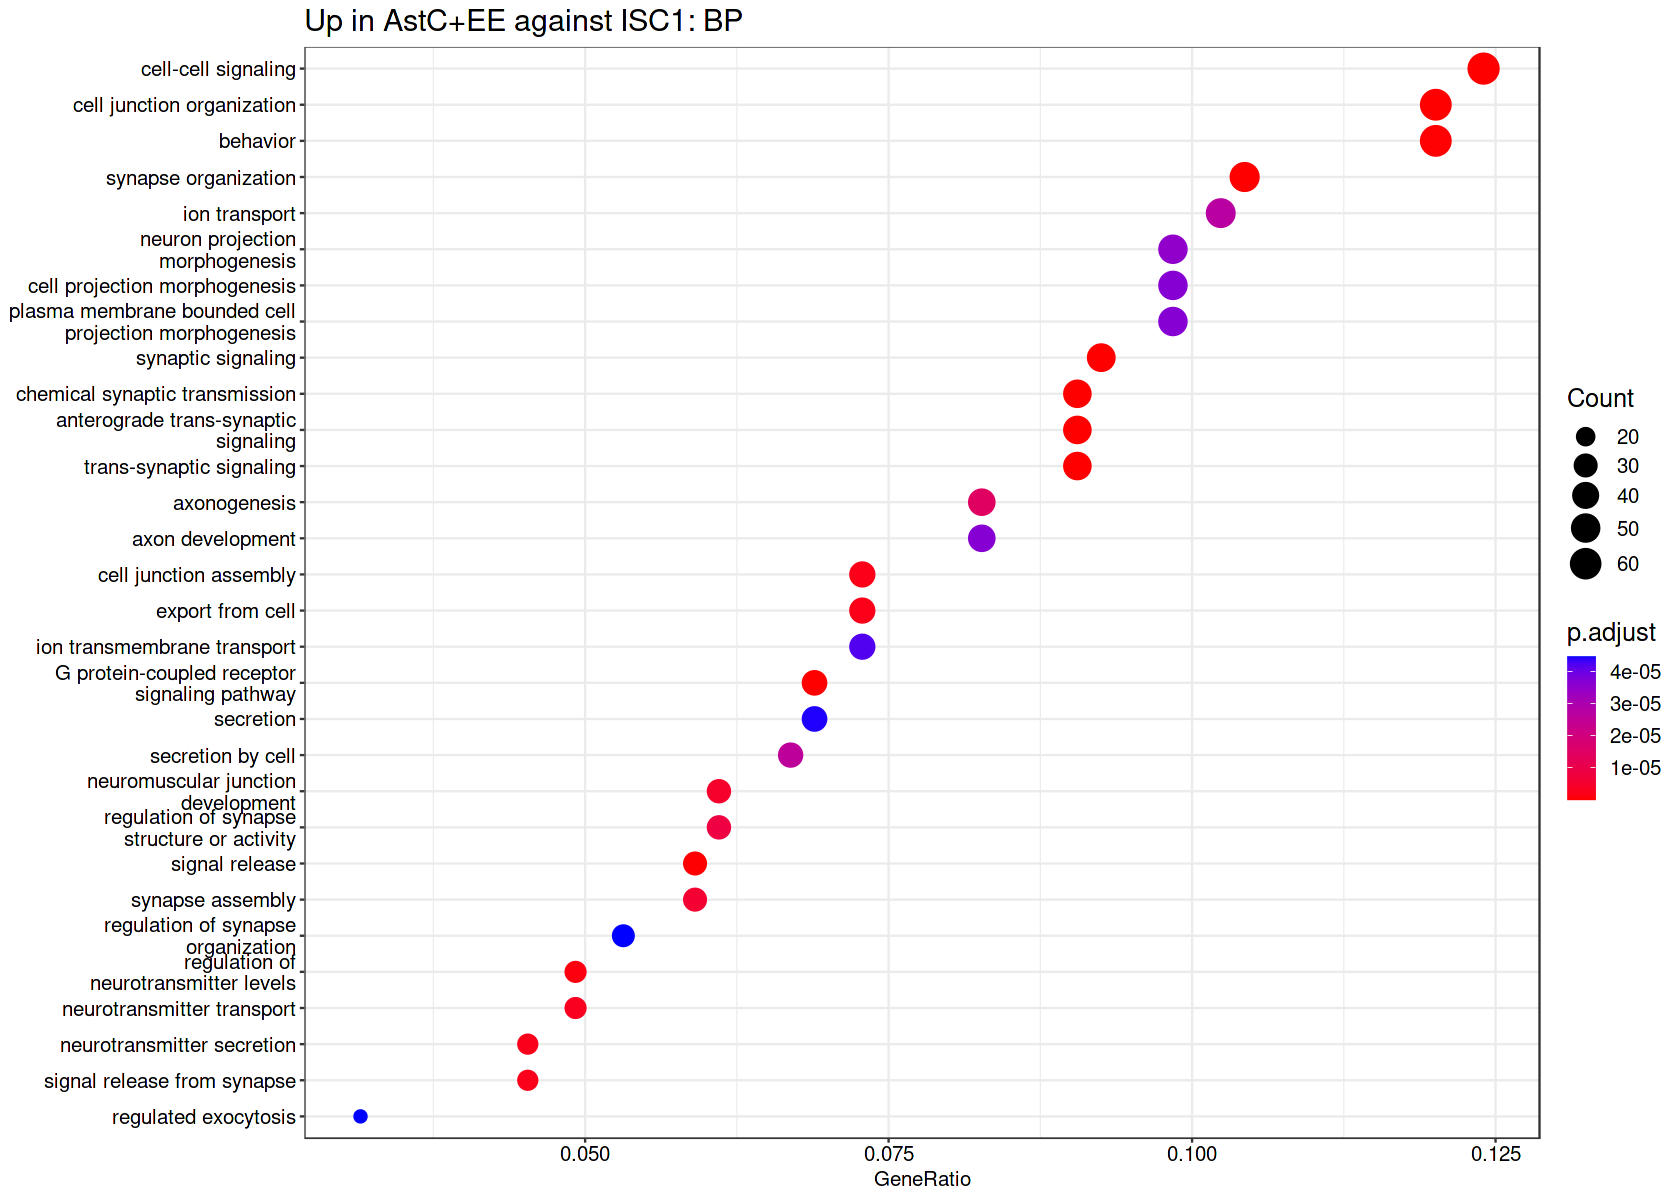

In [18]:
gene_list2 <- na.omit(convertID(astcee.DEGxISC1$gene))

ego <- enrichGO(gene = gene_list2, 
             universe = all_genes,
             OrgDb = org.Dm.eg.db,
             ont ="BP", 
             pAdjustMethod = "BH",
             qvalueCutoff  = 0.05,
             pvalueCutoff = 0.05, 
             readable = TRUE
            )
    
options(repr.plot.width = 14, repr.plot.height = 10)
dotplot(ego, showCategory = 30) + 
    ggtitle(paste0("Up in AstC+EE against ISC1: BP")) +
    theme(text = element_text(size=15))

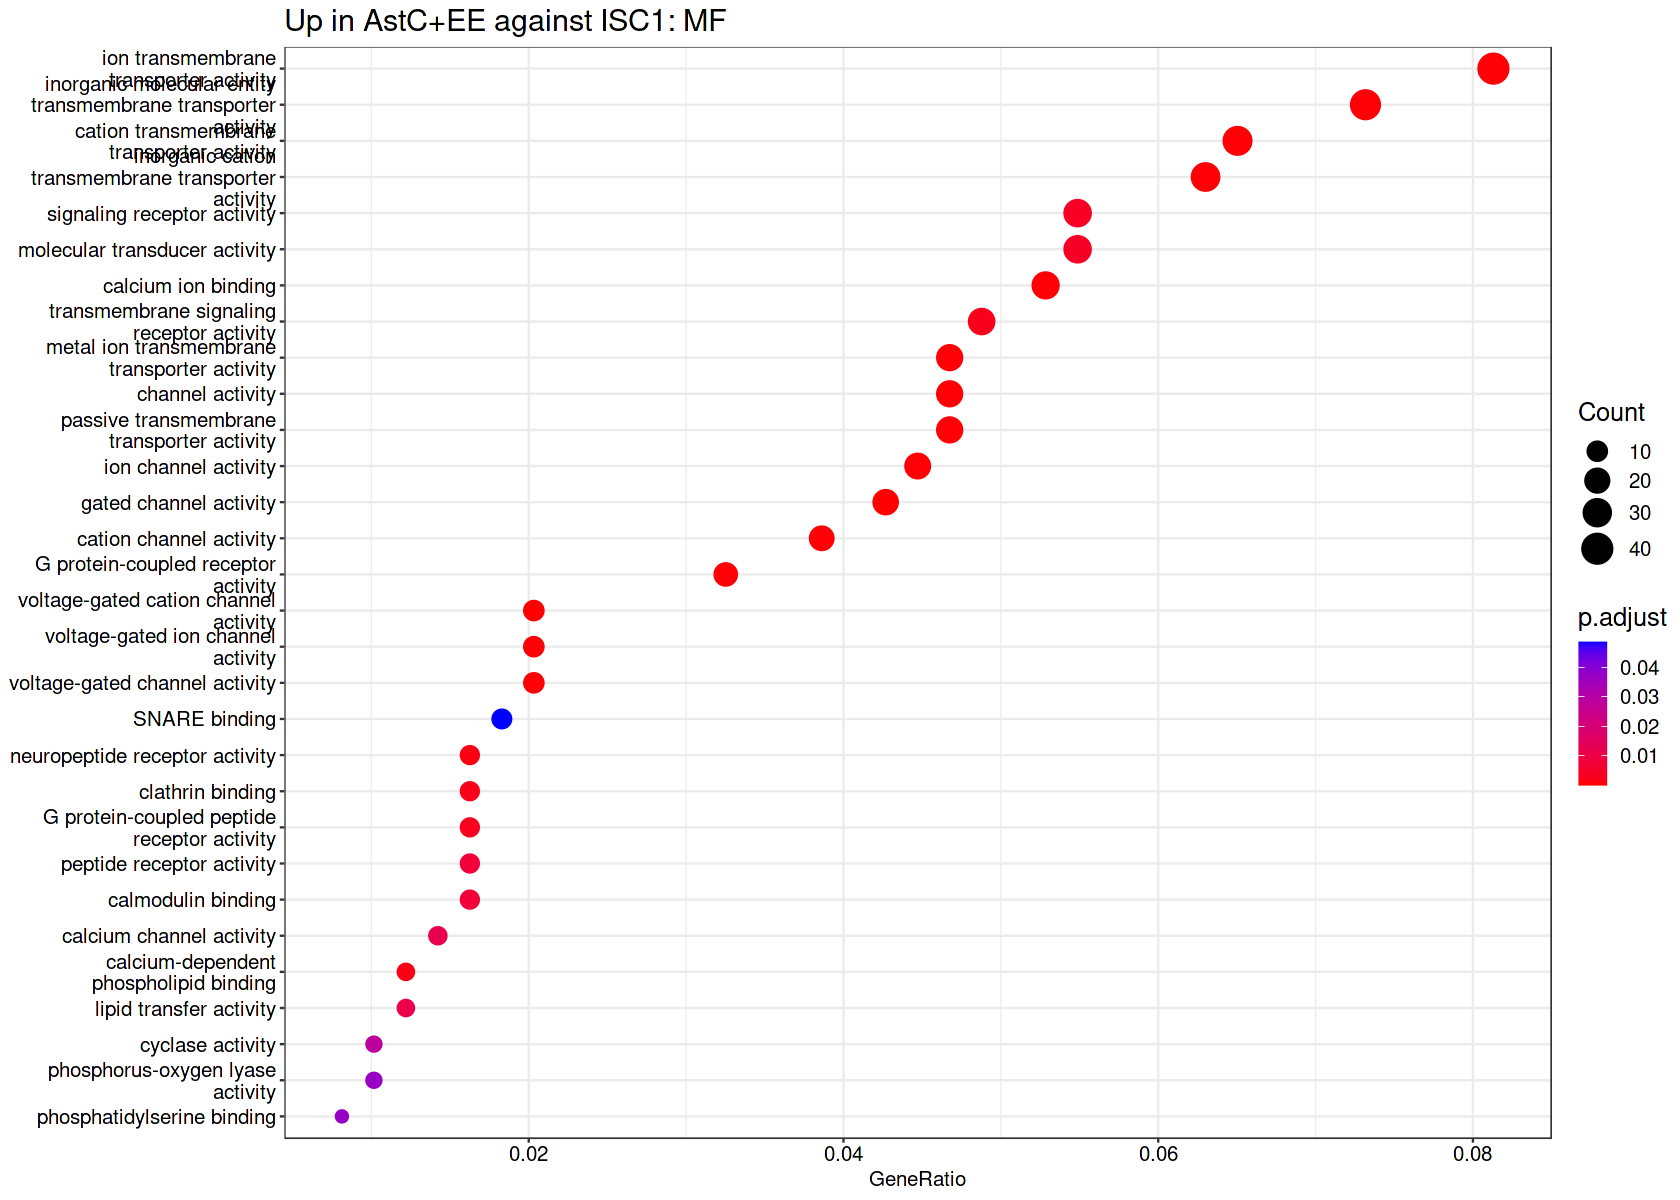

In [19]:
ego <- enrichGO(gene = gene_list2, 
             universe = all_genes,
             OrgDb = org.Dm.eg.db,
             ont ="MF", 
             pAdjustMethod = "BH",
             qvalueCutoff  = 0.05,
             pvalueCutoff = 0.05, 
             readable = TRUE
            )
    
options(repr.plot.width = 14, repr.plot.height = 10)
dotplot(ego, showCategory = 30) + 
    ggtitle(paste0("Up in AstC+EE against ISC1: MF")) +
    theme(text = element_text(size=15))

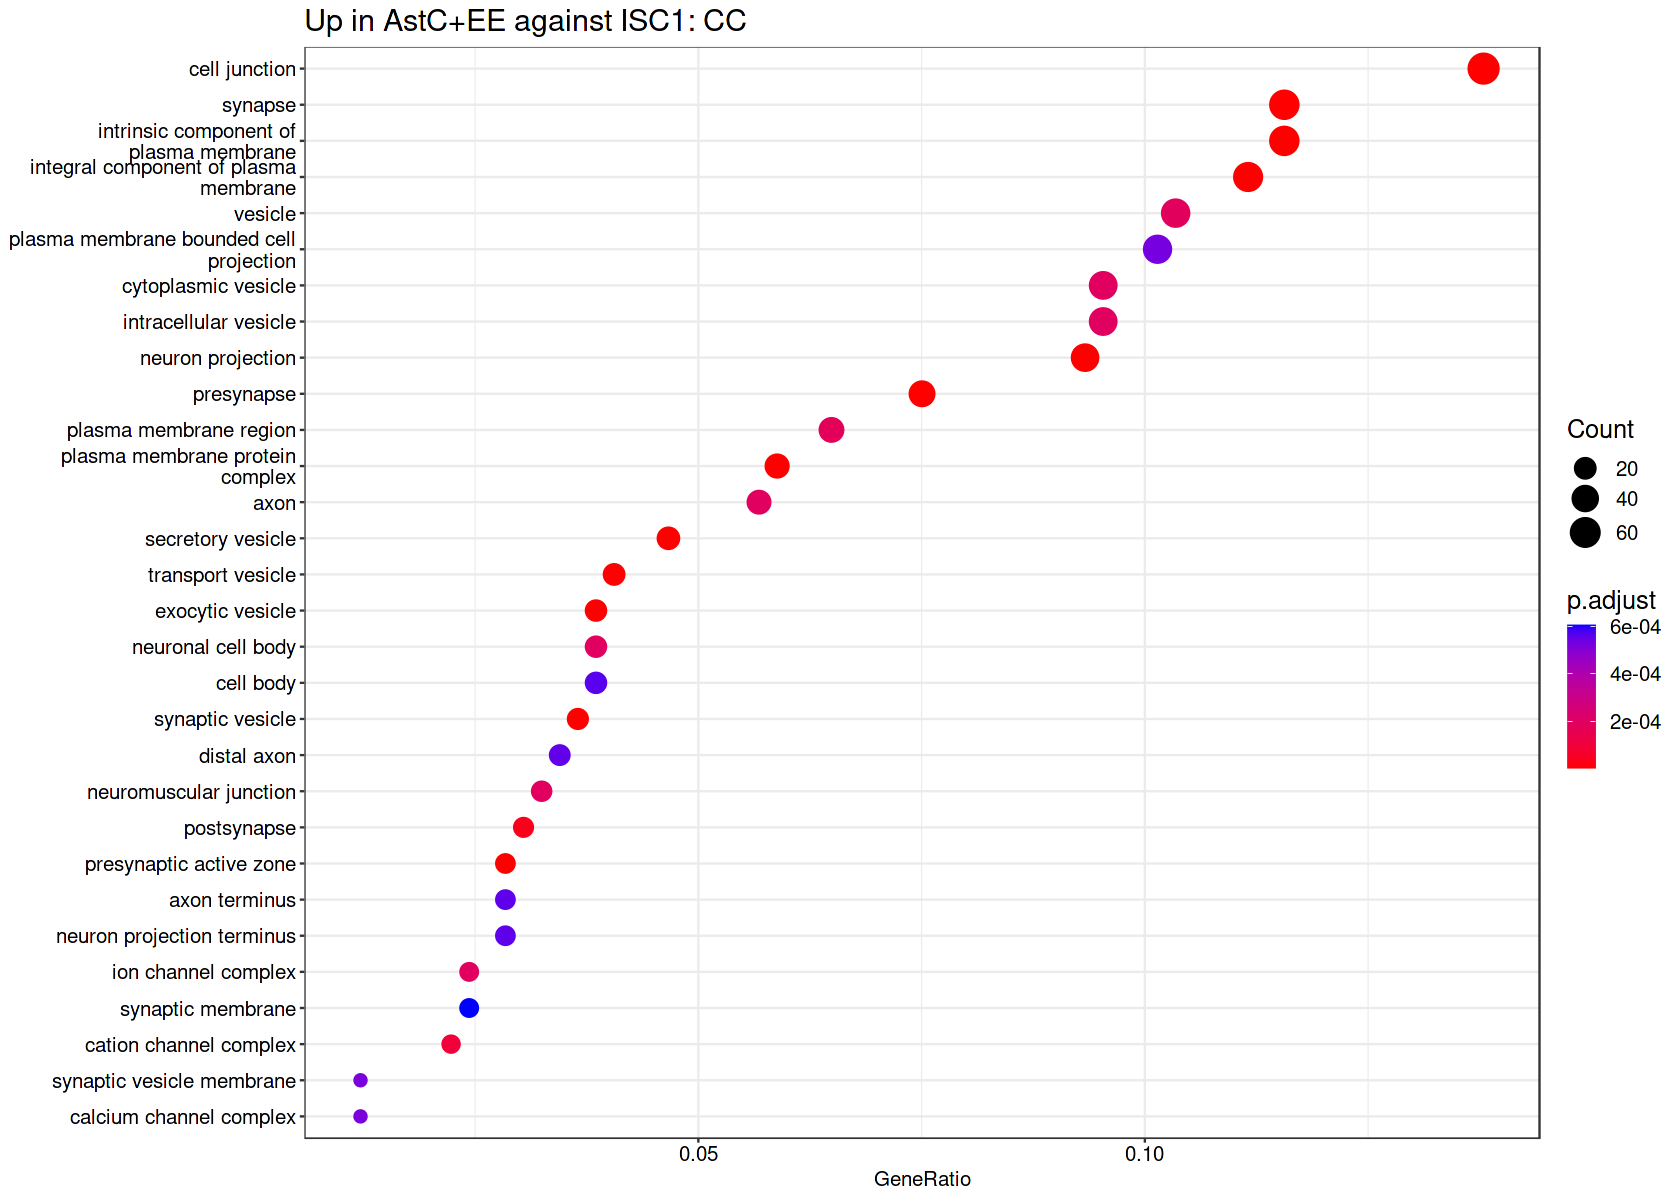

In [20]:
ego <- enrichGO(gene = gene_list2, 
             universe = all_genes,
             OrgDb = org.Dm.eg.db,
             ont ="CC", 
             pAdjustMethod = "BH",
             qvalueCutoff  = 0.05,
             pvalueCutoff = 0.05, 
             readable = TRUE
            )
    
options(repr.plot.width = 14, repr.plot.height = 10)
dotplot(ego, showCategory = 30) + 
    ggtitle(paste0("Up in AstC+EE against ISC1: CC")) +
    theme(text = element_text(size=15))

In [21]:
# Identify DEGs in EE clusters comparing against Tk+EE

# search for positive markers
astcee.DEGxTkEE.markers <- FindMarkers(so, 
                                       ident.1 = "AstC+EE", 
                                       ident.2 = "Tk+EE", 
                                       only.pos = FALSE)

# view results
head(astcee.DEGxTkEE.markers, 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CG44325,2.378814e-23,-4.014001,0.147,1.000,2.285326e-19
Tk,3.629534e-23,-5.039462,0.074,1.000,3.486893e-19
TrpA1,3.771809e-23,-2.736033,0.088,1.000,3.623577e-19
NPF,3.930764e-23,-10.747164,0.191,1.000,3.776285e-19
CG12934,4.286315e-21,-9.864257,0.088,0.926,4.117863e-17
CG7191,1.086831e-20,-4.306865,0.059,0.926,1.044119e-16
Hk,3.315293e-20,-3.089440,0.206,0.963,3.185002e-16
Scp2,3.712774e-20,-4.003869,0.132,0.926,3.566862e-16
CG15312,6.844563e-20,-2.814375,0.294,0.981,6.575571e-16


In [22]:
length(rownames(astcee.DEGxTkEE.markers))

[1] 2547

In [23]:
astcee.DEGxTkEE.markers <- astcee.DEGxTkEE.markers  %>% filter(p_val_adj < 0.05) %>% arrange(desc(avg_log2FC))
head(astcee.DEGxTkEE.markers, 30)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CG14989,2.568544e-08,7.210871,0.471,0.019,2.467600e-04
CG9568,1.072986e-06,6.019017,0.529,0.148,1.030818e-02
E(spl)m7-HLH,7.243726e-09,3.840159,0.500,0.019,6.959047e-05
Ssk,5.298266e-07,3.628254,0.456,0.056,5.090044e-03
CG13704,2.974490e-14,3.451167,0.779,0.093,2.857593e-10
E(spl)m8-HLH,1.720960e-08,3.376062,0.456,0.000,1.653327e-04
E(spl)m6-BFM,5.019766e-06,3.349249,0.324,0.000,4.822489e-02
Ir85a,5.018963e-06,3.220876,0.324,0.000,4.821718e-02
Tsp2A,4.616021e-14,3.143790,0.809,0.130,4.434612e-10


In [24]:
head(astcee.DEGxTkEE.markers)
dim(astcee.DEGxTkEE.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CG14989,2.568544e-08,7.210871,0.471,0.019,2.467600e-04
CG9568,1.072986e-06,6.019017,0.529,0.148,1.030818e-02
E(spl)m7-HLH,7.243726e-09,3.840159,0.500,0.019,6.959047e-05
Ssk,5.298266e-07,3.628254,0.456,0.056,5.090044e-03
CG13704,2.974490e-14,3.451167,0.779,0.093,2.857593e-10
E(spl)m8-HLH,1.720960e-08,3.376062,0.456,0.000,1.653327e-04


[1] 315   5

In [25]:
# save results
colnames(astcee.DEGxTkEE.markers)[1] <- "Gene ID"
#write.table(astcee.DEGxTkEE.markers, file = 'astcee.DEGxTkEE.markers.descFC_POSandNEG.tsv', quote = FALSE, sep = '\t', col.names = TRUE)

## Heatmap of the DEGs identified in AstC+EE x Tk+EE

[1] 315

Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Centering and scaling data matrix



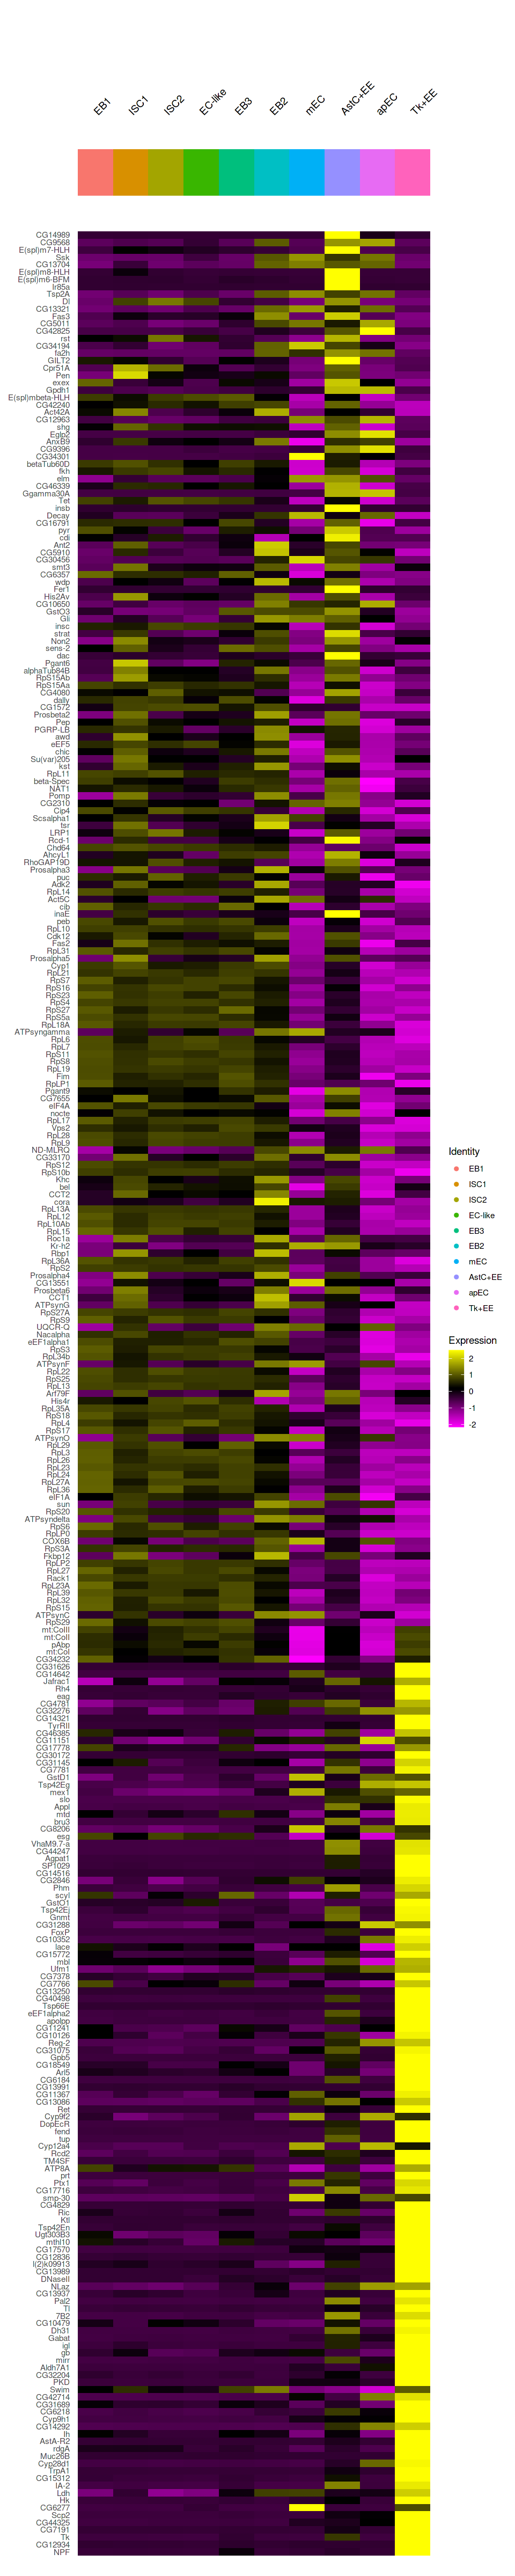

In [26]:
# Using DEGs AstC+EE x Tk+EE
genelist <- row.names(astcee.DEGxTkEE.markers)
length(genelist)
#head(genelist)

# make heatmap of expression using the DEGs identified between AstC+EE and TK+EE 
# Include all other cell types as well
cluster.averages = AverageExpression(so, return.seurat=TRUE, group.by=c('ident'))


#PLOT
options(repr.plot.width = 8, repr.plot.height = 40)
DoHeatmap(cluster.averages, features=head(genelist, 339), size=4, draw.lines = FALSE)

[1] 1707

Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Warning message in PseudobulkExpression(object = object, pb.method = "average", :
“Exponentiation yielded infinite values. `data` may not be log-normed.”
Centering and scaling data matrix



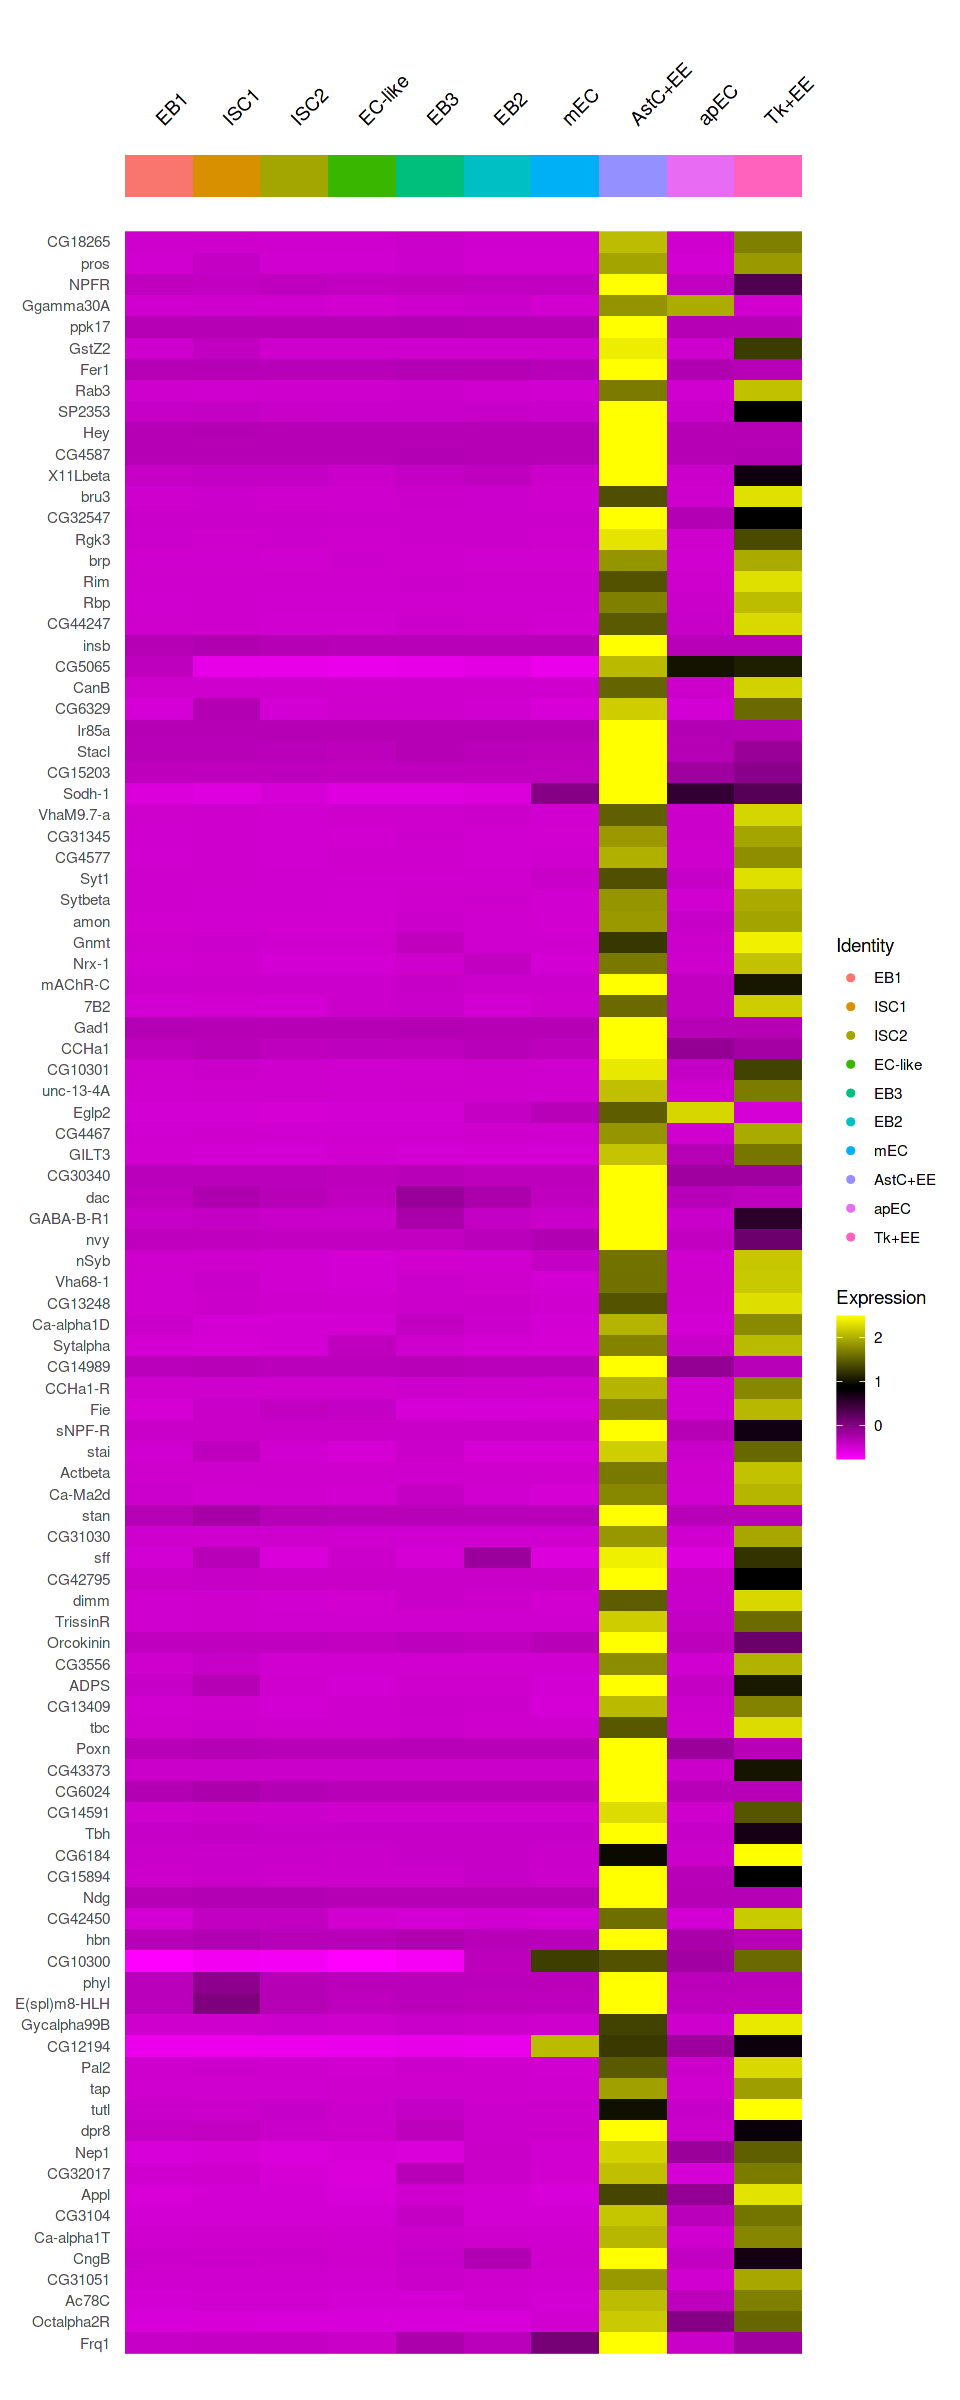

In [27]:
# Using DEGs AstC+EE x other clusters
genelist <- row.names(astcee.DEGxAll.markers)
length(genelist)
#head(genelist)

# make heatmap of expression using the DEGs identified between AstC+EE and TK+EE 
# Include all other cell types as well
cluster.averages = AverageExpression(so, return.seurat=TRUE, group.by=c('ident'))

#PLOT
options(repr.plot.width = 8, repr.plot.height = 20)
DoHeatmap(cluster.averages, features=head(genelist, 100), size=4, draw.lines = FALSE)

In [29]:
cluster.averages

An object of class Seurat 
51496 features across 10 samples within 4 assays 
Active assay: SCT (9607 features, 0 variable features)
 3 other assays present: unspliced, ambiguous, spliced

# GO term enrichment

In [30]:
so.markers <- FindAllMarkers(so, 
                            only.pos = TRUE, 
                            min.pct = 0.1, 
                            logfc.threshold = 0.7)

# Let's visualize some of those genes
so.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)

Calculating cluster EB1

Calculating cluster ISC1

Calculating cluster ISC2

Calculating cluster EC-like

Calculating cluster EB3

Calculating cluster EB2

Calculating cluster mEC

Calculating cluster AstC+EE

Calculating cluster apEC

Calculating cluster Tk+EE



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2.193300e-267,2.155822,0.827,0.480,2.107103e-263,EB1,unc-104
1.233494e-188,2.031541,0.890,0.728,1.185018e-184,EB1,Prx2540-1
5.371925e-280,2.241471,0.752,0.187,5.160808e-276,ISC1,Pen
1.908639e-191,1.846996,0.694,0.230,1.833629e-187,ISC1,CG1943
3.577360e-241,1.431031,0.907,0.493,3.436770e-237,ISC2,ed
1.040159e-159,1.438453,0.673,0.243,9.992806e-156,ISC2,Dl
1.017046e-65,1.044866,0.824,0.233,9.770764e-62,EC-like,Ag5r2
7.566265e-62,1.043414,0.981,0.635,7.268910e-58,EC-like,Jon25Biii
1.109851e-57,3.024719,0.736,0.237,1.066234e-53,EB3,Hsp68


In [31]:
##################################################################
#Subsetting top 100 markers with adjusted p values lower than .05#
##################################################################
top100 <- so.markers %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)
top100pval <- subset(top100, rowSums(top100[5] < 0.05) > 0)

In [32]:
##################################################################
#Subsetting top 150 markers with adjusted p values lower than .05#
##################################################################
top150 <- so.markers %>% group_by(cluster) %>% top_n(n = 150, wt = avg_log2FC)
top150pval <- subset(top150, rowSums(top150[5] < 0.05) > 0)

In [33]:
##################################################################
#Subsetting top 200 markers with adjusted p values lower than .05#
##################################################################
top200 <- so.markers %>% group_by(cluster) %>% top_n(n = 200, wt = avg_log2FC)
top200pval <- subset(top200, rowSums(top200[5] < 0.05) > 0)

## Using ClusterProfiler

In [34]:
# Libraries
suppressPackageStartupMessages({
    library("clusterProfiler")
    library("org.Dm.eg.db")
    library("AnnotationHub")
})

In [35]:
df <- top100pval[,7:6]
dfsample <- split(df$gene,df$cluster)
length(dfsample)

[1] 10

In [36]:
convertID <- function(list_symbols){
    convertedIDs <- bitr(list_symbols,
                         fromType = "SYMBOL",
                         toType = "ENTREZID",
                         OrgDb = "org.Dm.eg.db",
                         drop = TRUE)
    return(convertedIDs$ENTREZID)
    }
df2 <- lapply(dfsample, convertID)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [37]:
GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Dm.eg.db")

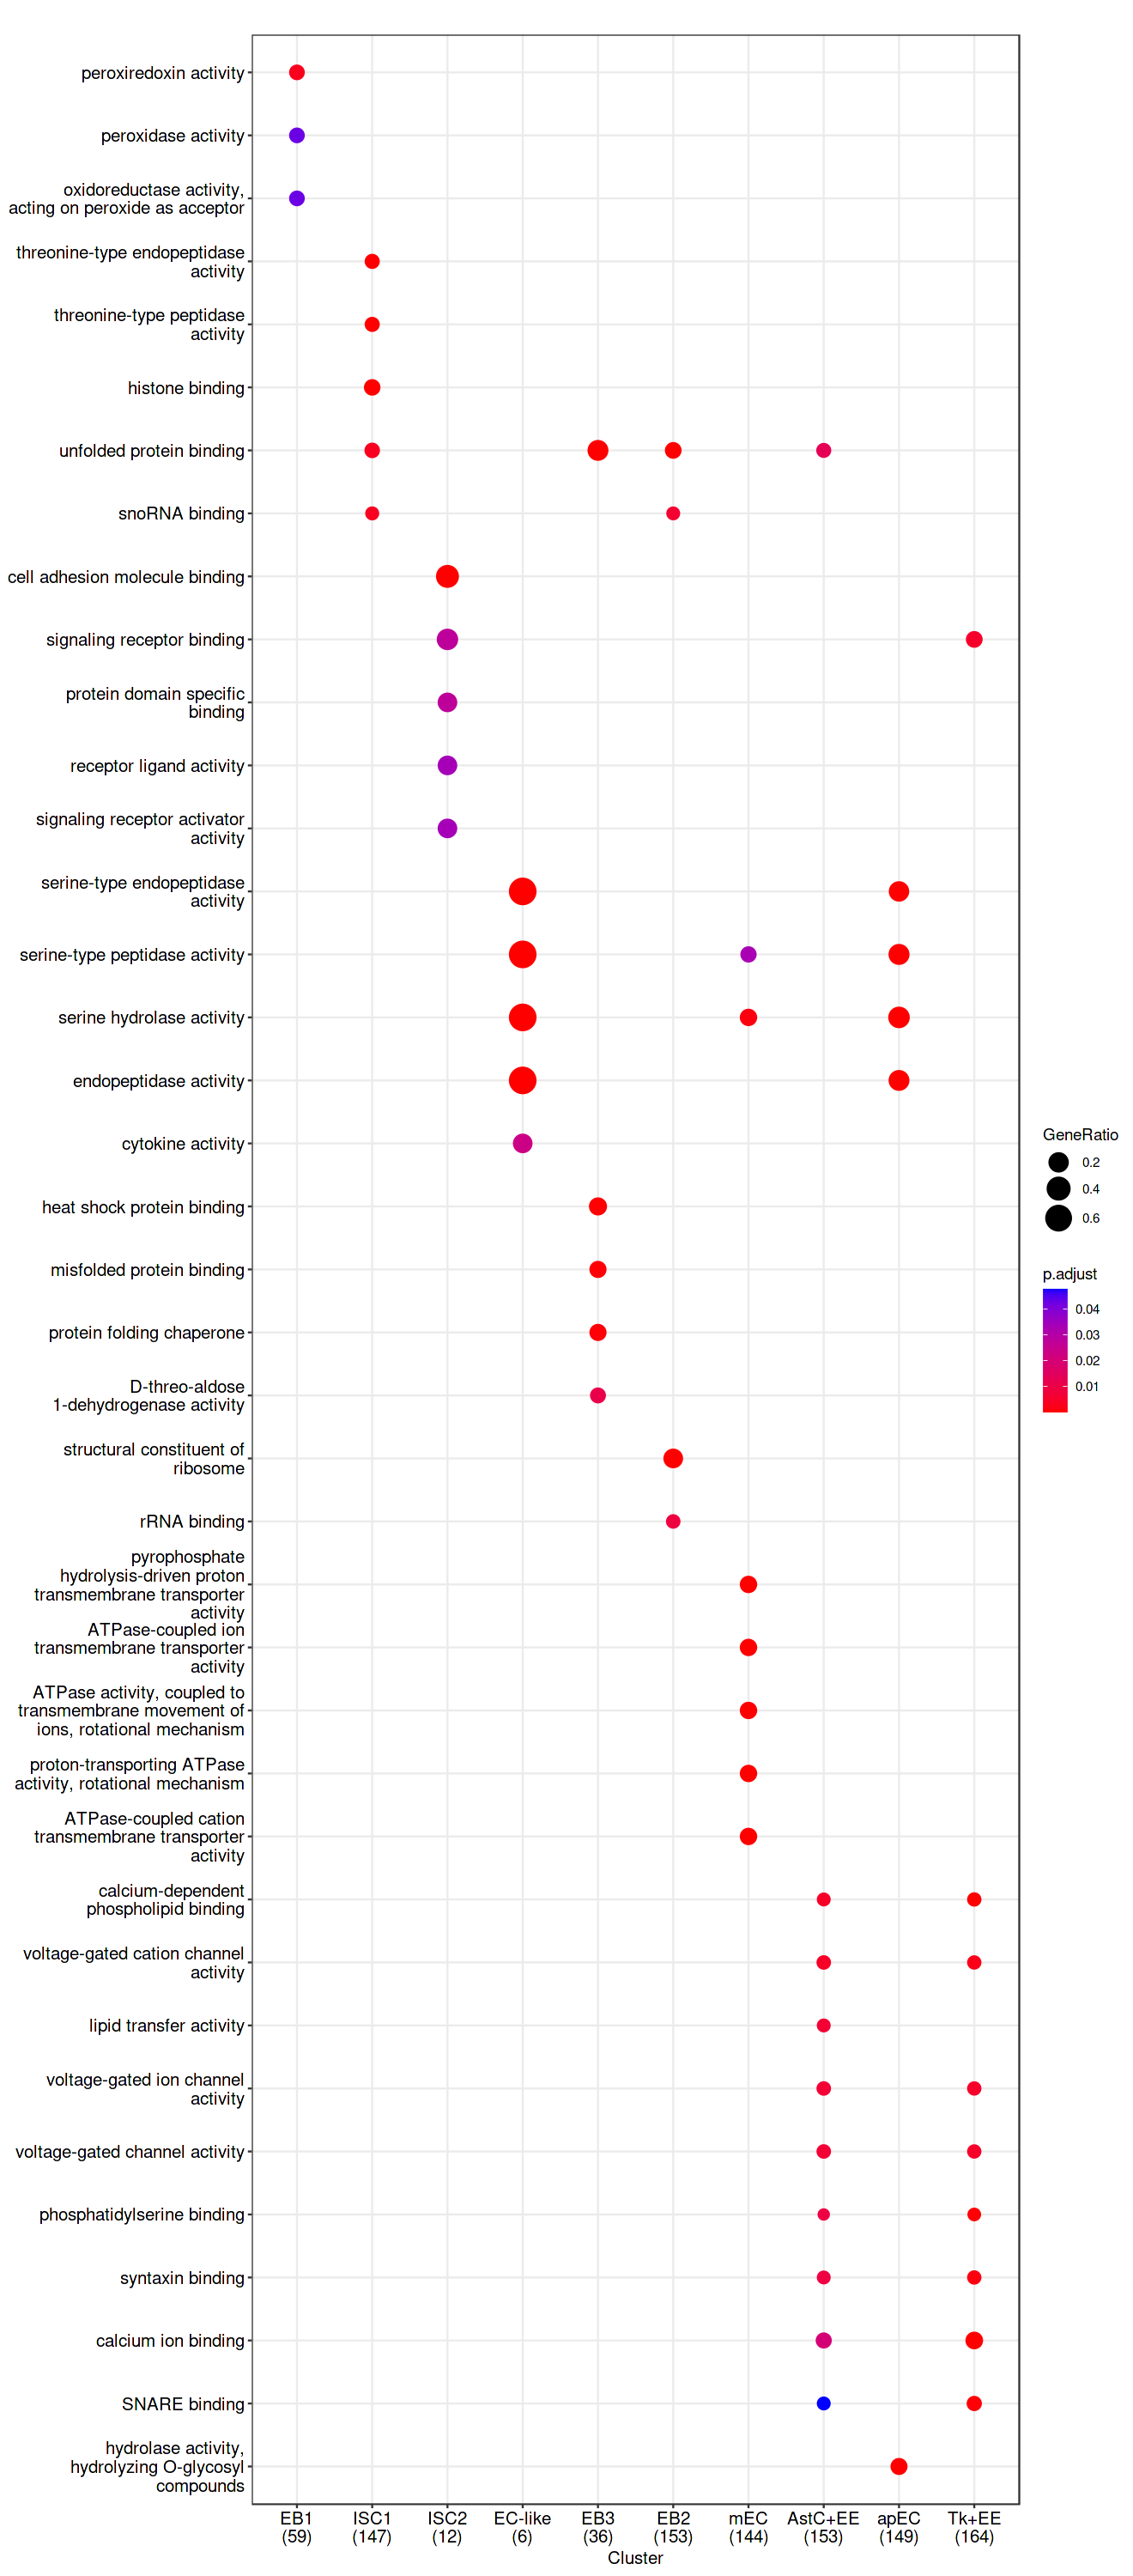

In [44]:
options(repr.plot.width = 11, repr.plot.height = 25)
dotplot(GOclusterplot,
        font.size = 12,
        label_format = 30,)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



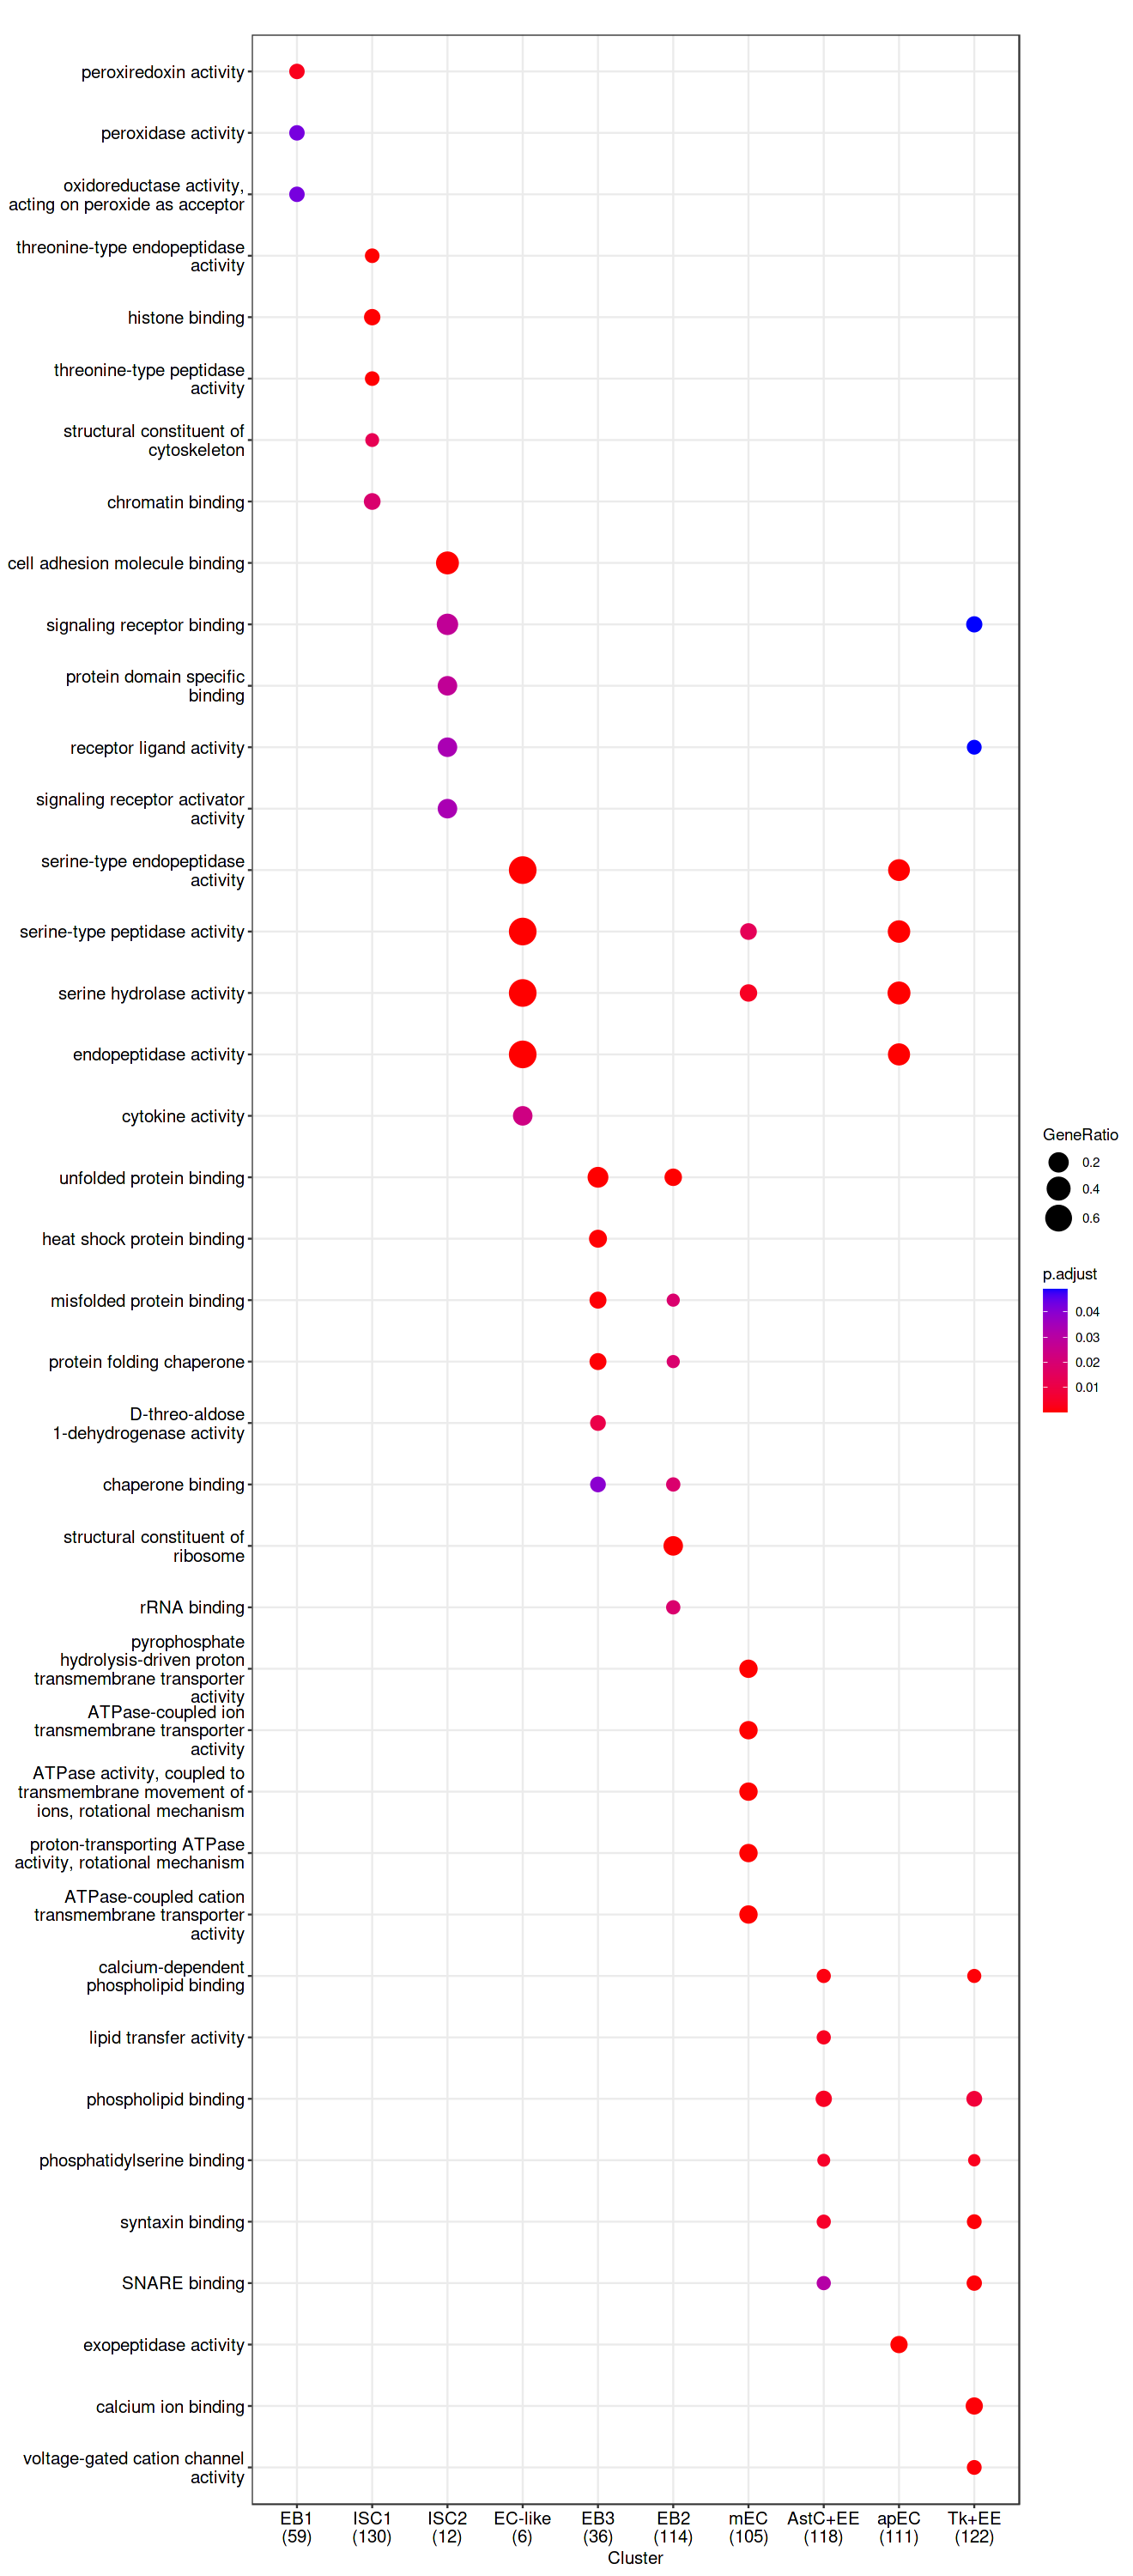

In [69]:
df <- top150pval[,7:6]
dfsample <- split(df$gene,df$cluster)

df2 <- lapply(dfsample, convertID)

options(repr.plot.width = 11, repr.plot.height = 25)
GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Dm.eg.db")

dotplot(GOclusterplot)
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top150_AstCEE_vs_TkEE_compareCluster.pdf", width=11, height=25)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



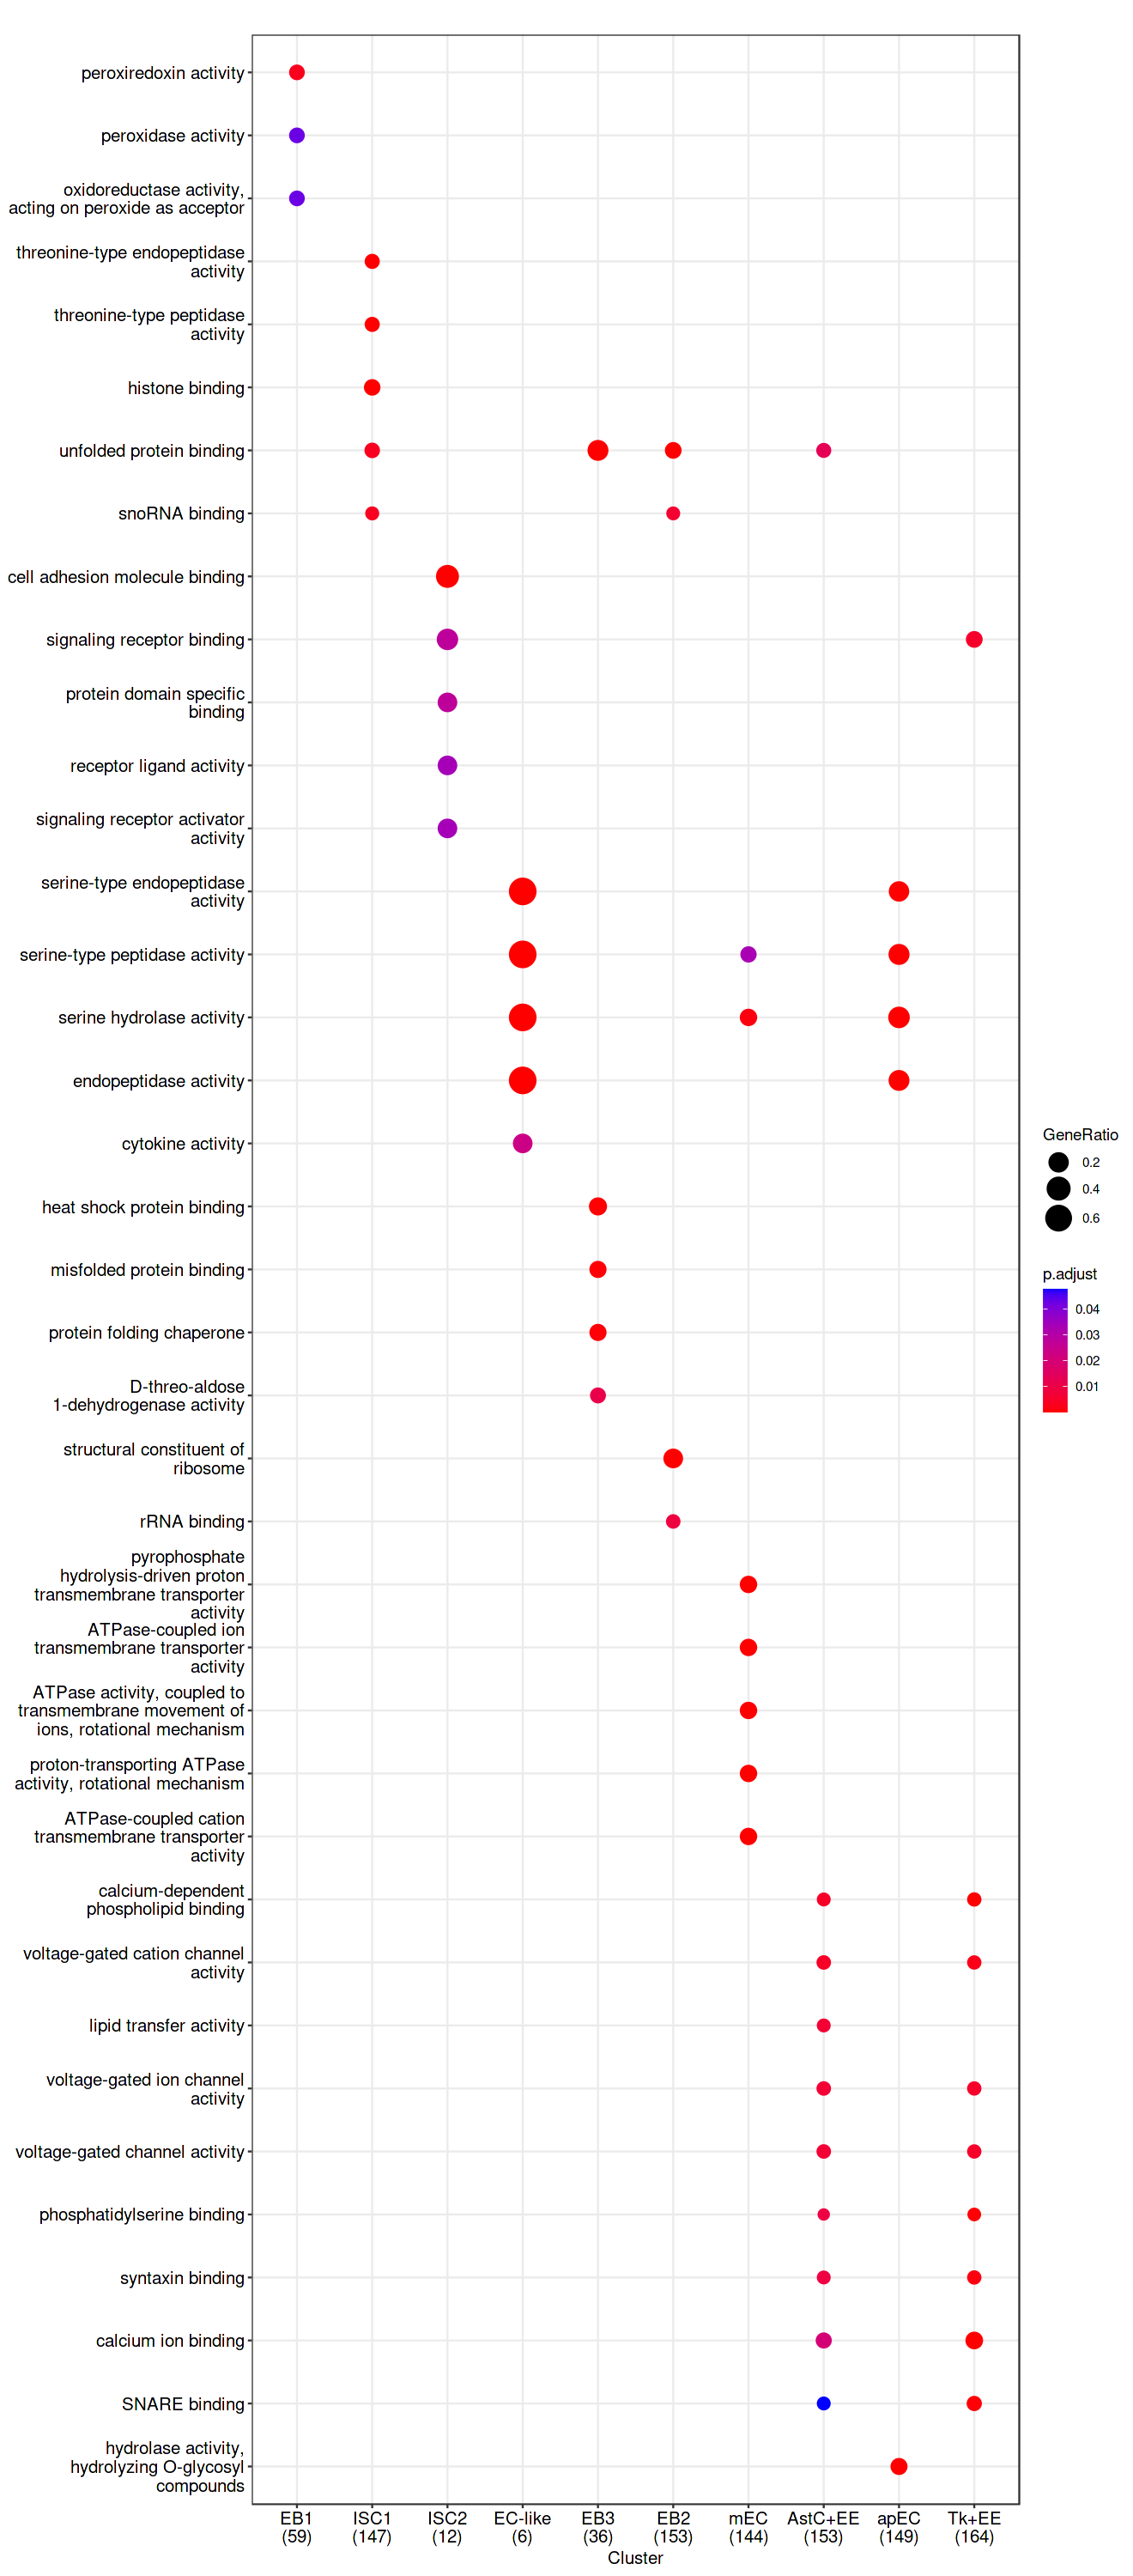

In [46]:
options(repr.plot.width = 11, repr.plot.height = 25)

df <- top200pval[,7:6]
dfsample <- split(df$gene,df$cluster)

df2 <- lapply(dfsample, convertID)

GOclusterplot <- compareCluster(geneCluster = df2, fun = "enrichGO", OrgDb = "org.Dm.eg.db")

dotplot(GOclusterplot)
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top200_AstCEE_vs_TkEE_compareCluster.pdf", width=11, height=25)

In [47]:
# Identify DEGs in EE clusters comparing against Tk+EE

# search for positive markers
astcee.DEGxTkEE.markers <- FindMarkers(so, 
                                       ident.1 = "AstC+EE", 
                                       ident.2 = "Tk+EE", 
                                       only.pos = TRUE)

astcee.DEGxTkEE.markers <- astcee.DEGxTkEE.markers %>% arrange(desc(avg_log2FC))

# view results
head(astcee.DEGxTkEE.markers, 10)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CG14989,2.568544e-08,7.210871,0.471,0.019,2.467600e-04
CCHa2,3.488248e-02,6.862786,0.147,0.037,1.000000e+00
AstC,1.682888e-01,6.275380,0.471,0.574,1.000000e+00
CG9568,1.072986e-06,6.019017,0.529,0.148,1.030818e-02
Orcokinin,4.696189e-03,5.093689,0.485,0.389,1.000000e+00
CCHa1,2.551843e-04,4.819358,0.353,0.093,1.000000e+00
AstA,9.631273e-03,4.779043,0.118,0.000,1.000000e+00
Fst,8.108626e-03,4.257064,0.353,0.167,1.000000e+00
CG34386,3.636001e-02,4.129239,0.118,0.019,1.000000e+00


In [49]:
##################################################################
#Subsetting top N markers with adjusted p values lower than .05#
##################################################################

#made a function to run based on N genes
go_func <- function(ngenes){
    topN <- astcee.DEGxTkEE.markers %>% top_n(n = ngenes, wt = avg_log2FC)
    topNpval <- subset(topN, rowSums(topN[5] < 0.05) > 0)

    gene_list <- na.omit(rownames(topNpval))

    # convert to entreID
    gene_list2 <- convertID(gene_list)

    gene_list2 = sort(gene_list2, decreasing = TRUE)
    #length(gene_list2)


    # universe
    all_genes <- na.omit(convertID(rownames(x = so)))
                       
    #length(all_genes)

    ego <- enrichGO(gene = gene_list2, 
             universe = all_genes,
             OrgDb = org.Dm.eg.db,
             ont ="BP", 
             pAdjustMethod = "BH",
             qvalueCutoff  = 0.01,
             pvalueCutoff = 0.01, 
            )
    dotplot(ego, font.size = 18,) + 
        ggtitle(paste0("Top ",ngenes," genes")) +
        theme(text = element_text(size=20))
    
    mutate(ego, qscore = -log(p.adjust, base=10)) %>% 
    barplot(x = "qscore")
}

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“0.11% of input gene IDs are fail to map...”


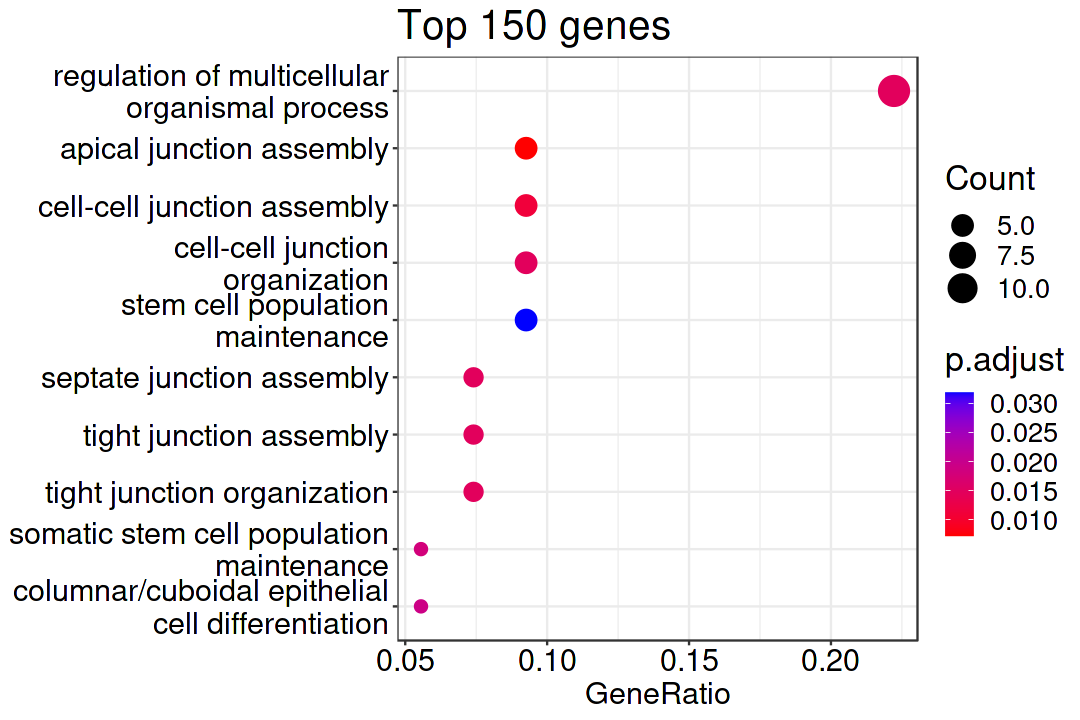

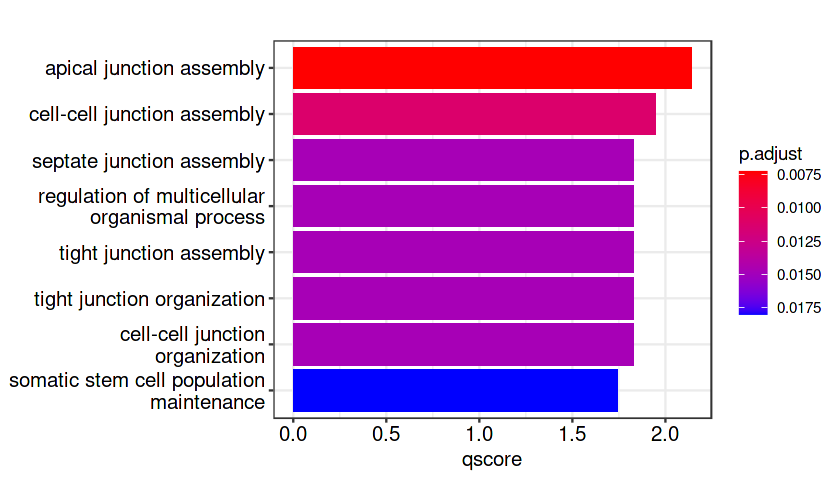

In [66]:
ngenes <- 150

topN <- astcee.DEGxTkEE.markers %>% top_n(n = ngenes, wt = avg_log2FC)
topNpval <- subset(topN, rowSums(topN[5] < 0.05) > 0)
gene_list <- na.omit(rownames(topNpval))

# convert to entreID
gene_list2 <- convertID(gene_list)
gene_list2 = sort(gene_list2, decreasing = TRUE)
#length(gene_list2)

# universe
all_genes <- na.omit(convertID(rownames(x = so)))
#length(all_genes)

ego <- enrichGO(gene = gene_list2, 
        universe = all_genes,
        OrgDb = org.Dm.eg.db,
        ont ="BP", 
        pAdjustMethod = "BH",
        qvalueCutoff  = 0.05,
        pvalueCutoff = 0.05, 
    )

options(repr.plot.width = 9, repr.plot.height = 6)
dotplot(ego, font.size = 18,) + 
    ggtitle(paste0("Top ",ngenes," genes")) +
    theme(text = element_text(size=20))
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top150_AstCEE_vs_TkEE_dotplot.pdf", width=9, height=6)

options(repr.plot.width = 7, repr.plot.height = 4)
mutate(ego, qscore = -log(p.adjust, base=10)) %>% 
    barplot(x = "qscore")
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top150_AstCEE_vs_TkEE_barplot.pdf", width=7, height=4)

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“0.11% of input gene IDs are fail to map...”


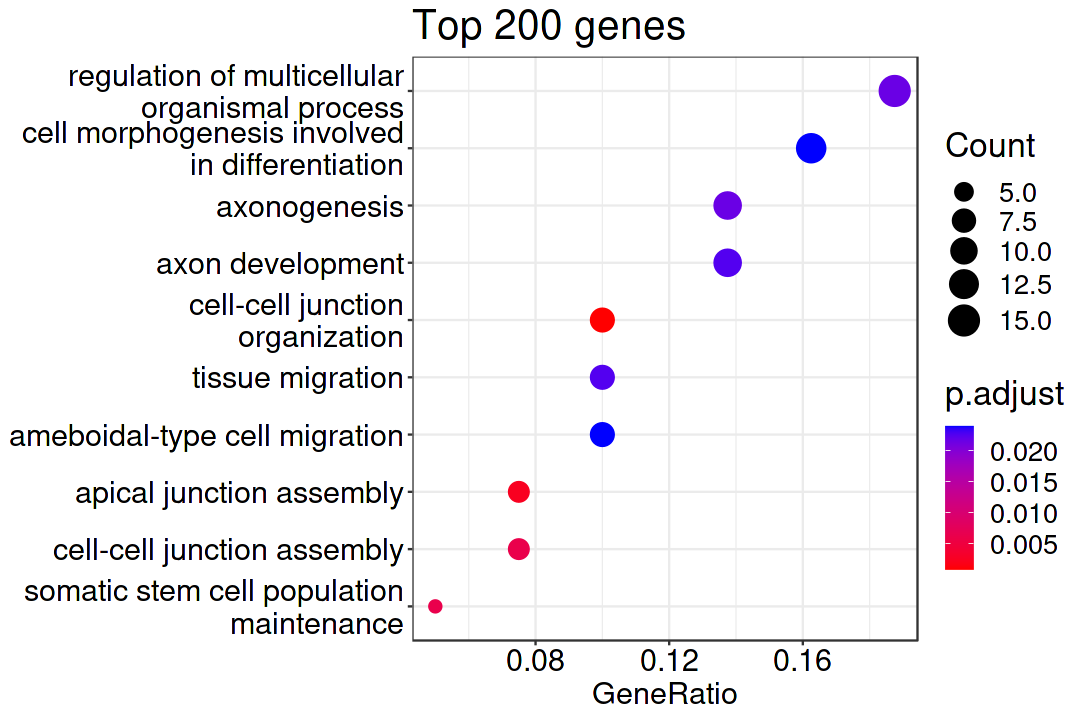

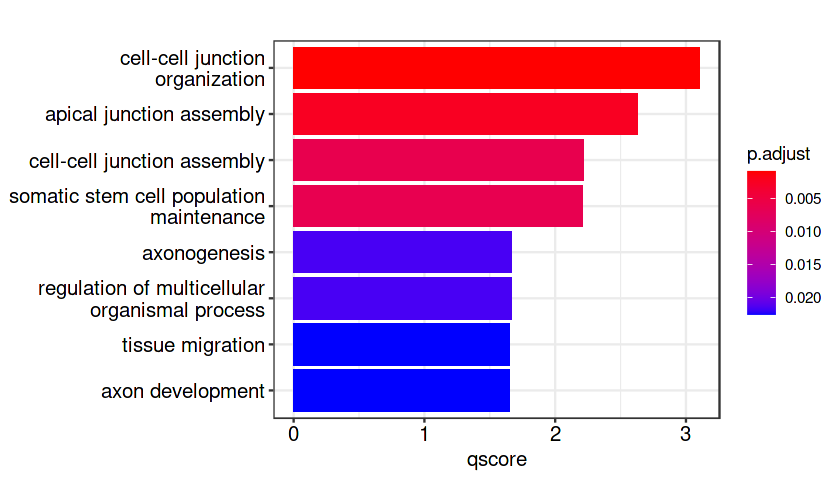

In [65]:
ngenes <- 200

topN <- astcee.DEGxTkEE.markers %>% top_n(n = ngenes, wt = avg_log2FC)
topNpval <- subset(topN, rowSums(topN[5] < 0.05) > 0)
gene_list <- na.omit(rownames(topNpval))

# convert to entreID
gene_list2 <- convertID(gene_list)
gene_list2 = sort(gene_list2, decreasing = TRUE)
#length(gene_list2)

# universe
all_genes <- na.omit(convertID(rownames(x = so)))
#length(all_genes)

ego <- enrichGO(gene = gene_list2, 
        universe = all_genes,
        OrgDb = org.Dm.eg.db,
        ont ="BP", 
        pAdjustMethod = "BH",
        qvalueCutoff  = 0.05,
        pvalueCutoff = 0.05, 
    )

options(repr.plot.width = 9, repr.plot.height = 6)
dotplot(ego, font.size = 18,) + 
    ggtitle(paste0("Top ",ngenes," genes")) +
    theme(text = element_text(size=20))
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top200_AstCEE_vs_TkEE_dotplot.pdf", width=9, height=6)

options(repr.plot.width = 7, repr.plot.height = 4)
mutate(ego, qscore = -log(p.adjust, base=10)) %>% 
    barplot(x = "qscore")
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top200_AstCEE_vs_TkEE_barplot.pdf", width=7, height=4)

In [52]:
?qvalue::qvalue

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(list_symbols, fromType = "SYMBOL", toType = "ENTREZID", :
“0.11% of input gene IDs are fail to map...”


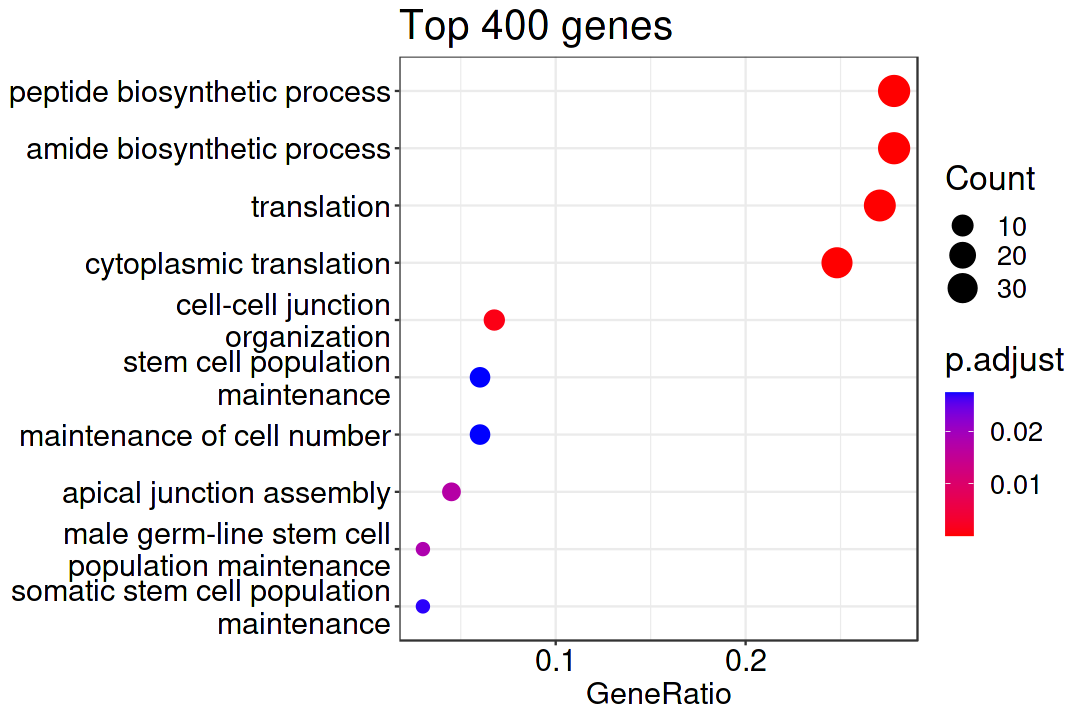

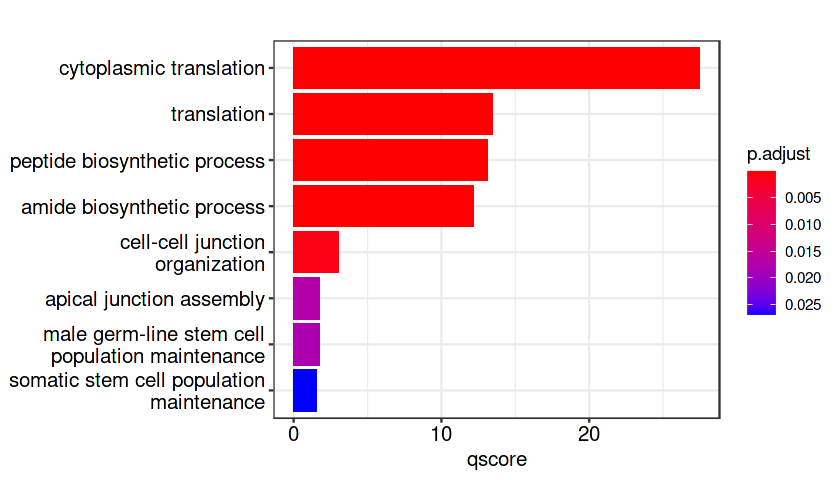

In [76]:
ngenes <- 400

topN <- astcee.DEGxTkEE.markers %>% top_n(n = ngenes, wt = avg_log2FC)
topNpval <- subset(topN, rowSums(topN[5] < 0.05) > 0)
gene_list <- na.omit(rownames(topNpval))

# convert to entreID
gene_list2 <- convertID(gene_list)
gene_list2 = sort(gene_list2, decreasing = TRUE)
#length(gene_list2)

# universe
all_genes <- na.omit(convertID(rownames(x = so)))
#length(all_genes)

ego <- enrichGO(gene = gene_list2, 
        universe = all_genes,
        OrgDb = org.Dm.eg.db,
        ont ="BP", 
        pAdjustMethod = "BH",
        qvalueCutoff  = 0.05,
        pvalueCutoff = 0.05,
        readable = TRUE
    )

options(repr.plot.width = 9, repr.plot.height = 6)
dotplot(ego, font.size = 18,) + 
    ggtitle(paste0("Top ",ngenes," genes")) +
    theme(text = element_text(size=20))
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top400_AstCEE_vs_TkEE_dotplot.pdf", width=9, height=6)

options(repr.plot.width = 7, repr.plot.height = 4)
mutate(ego, qscore = -log(p.adjust, base=10)) %>% 
    barplot(x = "qscore")
ggsave(file="../nakajima_drosophila_project_v2/paper_figures/FigS4c_GO_terms_top400_AstCEE_vs_TkEE_barplot.pdf", width=7, height=4)

In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] clusterProfiler_4.2.2       patchwork_1.1.1            
 [3] dplyr_1.0.8                 Matrix_1.4-0               
 [5] scater_1.22.0               ggplot2_3.3.5              
 [7] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [9] SummarizedExperiment_1.24.0 Biobase_2.54.0             
[11] 